In [353]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [354]:
df = pd.read_csv("impl.csv")
df

,Timestamp,"Укажите, пожалуйста, Ваш пол","Укажите, пожалуйста, Ваш возраст",Возрастная группа,"Пожалуйста, укажите сведения о вашем образовании: ступень (например, среднее, среднее специальное, неоконченное высшее, высшее, ученая степень) и количество лет (количество лет школьного образования + следующая ступень).\nНапример: высшее, 15",В каком сезоне у Вас день рождения?,"Правда ли, что некоторые из студентов разговаривают?","Правда ли, что девушка работает за ноутбуком?","Правда ли, что 5 студентов присутствуют на докладе?","Правда ли, что некоторые из участников хора поют?",...,"Правда ли, что девушка начала пить воду?","Можно ли описать ситуацию как ""Некоторые из студентов разговаривают""?","Можно ли описать ситуацию как ""Девушка работает за компьютером""?","Можно ли описать ситуацию как ""Пятеро студентов присутствуют на докладе""?","Можно ли описать ситуацию как ""Некоторые из участников хора поют""?","Можно ли описать ситуацию как ""2 человека стоят в очереди""?","Можно ли описать ситуацию как ""В кружке налит чай, его размешивают ложкой""?","Можно ли описать ситуацию как ""Девушка начала есть орехи""?","Можно ли описать ситуацию как ""К лифту идут две девушки""?","Можно ли описать ситуацию как ""Девушка начала пить воду""?"
0,12/19/2023 20:42:31,Женский,53,35+,дфн,Весна,Правда,Правда,Скорее правда,Правда,...,Неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/26/2023 14:16:06,Мужской,19,до 21,Неоконченное высшее,Весна,Скорее правда,Правда,Неправда,Неправда,...,Неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/26/2023 14:20:16,Женский,20,до 21,13,Весна,Правда,Правда,Правда,Правда,...,Скорее правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/26/2023 14:20:31,Женский,20,до 21,13,Зима,Правда,Правда,Скорее правда,Правда,...,Правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/26/2023 14:29:13,Мужской,45,35+,Высшее,Зима,Правда,Скорее правда,Скорее правда,Правда,...,Скорее неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,12/28/2023 14:36:16,Мужской,46,35+,"высшее, 15",Осень,NaN,NaN,NaN,NaN,...,NaN,Скорее можно,Можно,Скорее можно,Скорее можно,Скорее можно,Скорее можно,Скорее можно,Скорее нельзя,Можно
76,12/28/2023 15:52:00,Мужской,48,35+,16,Лето,NaN,NaN,NaN,NaN,...,NaN,Можно,Можно,Можно,Можно,Можно,Скорее можно,Скорее можно,Нельзя,Скорее можно
77,12/28/2023 15:52:43,Женский,51,35+,Среднее + высшее,Весна,Правда,Скорее правда,Неправда,Скорее неправда,...,Правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,12/28/2023 16:08:45,Женский,26,21-35,Неоконченное высшее,Весна,Скорее правда,Скорее правда,Скорее правда,Скорее правда,...,Скорее правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
# деление респондентов на группы (1 -- "правда ли...", 2 -- "можно ли...")
pravda = df[df["В каком сезоне у Вас день рождения?"].str.contains("Зима|Весна")]
mozhno = df[df["В каком сезоне у Вас день рождения?"].str.contains("Лето|Осень")]

# Демографическая информация (статистика по респондентам)

## Количество респондентов по полу

In [356]:
dict(Counter(df["Укажите, пожалуйста, Ваш пол"].tolist()))

{'Женский': 49, 'Мужской': 31}

## Среднее и медиана возраста

In [357]:
print(f'Среднее возраста: {np.mean(df["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())}')
print(f'Медиана возраста: {np.median(df["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())}')

Среднее возраста: 26.85
Медиана возраста: 21.0


## Стандартное отклонение возраста

In [358]:
np.std(df["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())

12.446987587364262

## Распределение возрастных групп по полу респондентов

In [359]:
# три возрастные группы: до 21, 21-35, 35+

#df.loc[(df["Укажите, пожалуйста, Ваш возраст"].astype(int) < 21), "Укажите, пожалуйста, Ваш возраст"] = "до 21"
#df.loc[(df["Укажите, пожалуйста, Ваш возраст"].astype(int) >= 21) & (df["Укажите, пожалуйста, Ваш возраст"] <= 35), "Укажите, пожалуйста, Ваш возраст"] = "21-35"
#df.loc[(df["Укажите, пожалуйста, Ваш возраст"].astype(int) > 35), "Укажите, пожалуйста, Ваш возраст"] = "35+"
#df

# добавила столбец в икселе

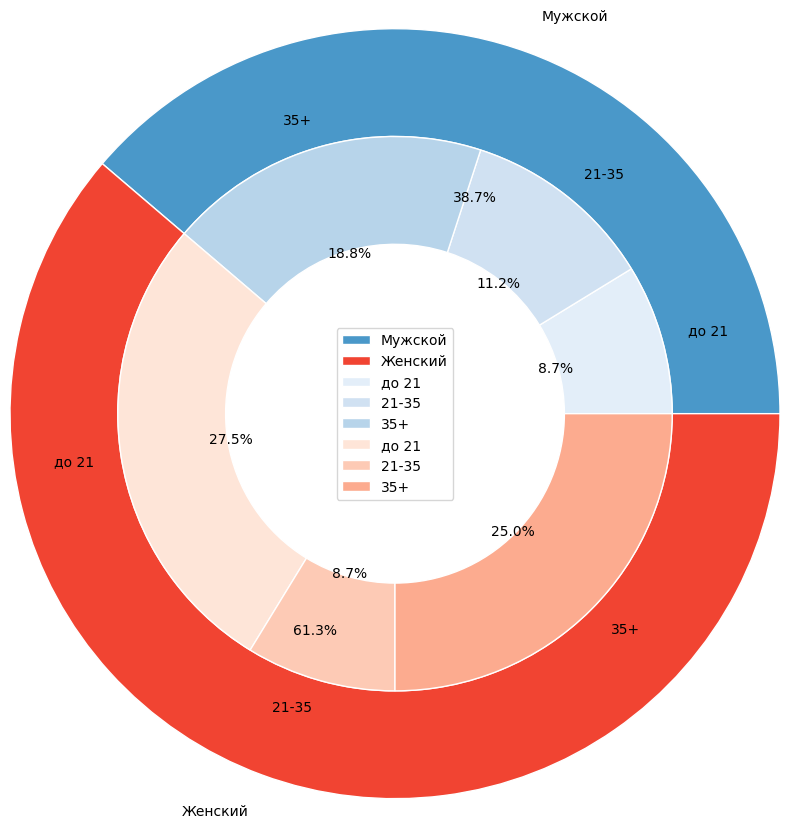

In [360]:
res = pd.crosstab(df['Возрастная группа'], df['Укажите, пожалуйста, Ваш пол'])

group_names=['Мужской', 'Женский']
subgroup_names=['до 21', '21-35', '35+', 'до 21', '21-35', '35+']

a, b = [plt.cm.Blues, plt.cm.Reds]

fig, ax = plt.subplots(figsize=(5,5))

size = 0.7
vals = np.array([pd.DataFrame(res)['Мужской'].tolist(), pd.DataFrame(res)['Женский'].tolist()])

plt.pie(vals.sum(axis=1), radius=2.5, labels=group_names, colors=[a(0.6), b(0.6)], wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', textprops={'fontsize': 10})

plt.pie(vals.flatten(), radius=2.5-size, labels=subgroup_names, colors=[a(0.1), a(0.2), a(0.3), b(0.1), b(0.2), b(0.3)],
        wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', textprops={'fontsize': 10})

ax.set(aspect="equal")

plt.legend(loc='center')
handles, labels = ax.get_legend_handles_labels()

plt.savefig('возраст_пол.png')

plt.show()

## Визуализация по возрасту респондентов

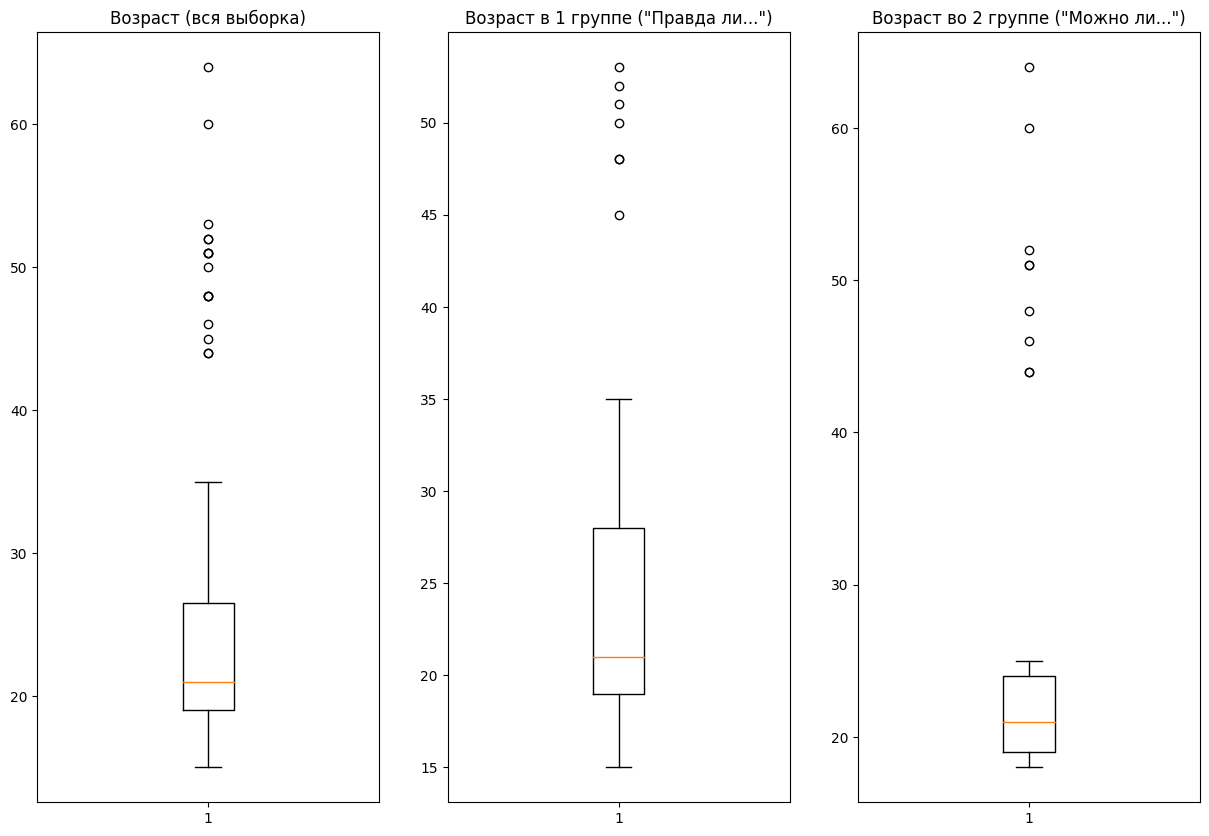

In [361]:
fig, axs = plt.subplots(1, 3, figsize=(15,10))

axs[0].boxplot(df["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())
axs[0].set_title('Возраст (вся выборка)')

axs[1].boxplot(pravda["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())
axs[1].set_title('Возраст в 1 группе ("Правда ли...")')

axs[2].boxplot(mozhno["Укажите, пожалуйста, Ваш возраст"].astype(int).tolist())
axs[2].set_title('Возраст во 2 группе ("Можно ли...")')

plt.savefig('ящики_с_усами.png')

plt.show()

# Мода по вопросам в зависимости от формулировки

## Датафреймы

In [362]:
pravda.head()

,Timestamp,"Укажите, пожалуйста, Ваш пол","Укажите, пожалуйста, Ваш возраст",Возрастная группа,"Пожалуйста, укажите сведения о вашем образовании: ступень (например, среднее, среднее специальное, неоконченное высшее, высшее, ученая степень) и количество лет (количество лет школьного образования + следующая ступень).\nНапример: высшее, 15",В каком сезоне у Вас день рождения?,"Правда ли, что некоторые из студентов разговаривают?","Правда ли, что девушка работает за ноутбуком?","Правда ли, что 5 студентов присутствуют на докладе?","Правда ли, что некоторые из участников хора поют?",...,"Правда ли, что девушка начала пить воду?","Можно ли описать ситуацию как ""Некоторые из студентов разговаривают""?","Можно ли описать ситуацию как ""Девушка работает за компьютером""?","Можно ли описать ситуацию как ""Пятеро студентов присутствуют на докладе""?","Можно ли описать ситуацию как ""Некоторые из участников хора поют""?","Можно ли описать ситуацию как ""2 человека стоят в очереди""?","Можно ли описать ситуацию как ""В кружке налит чай, его размешивают ложкой""?","Можно ли описать ситуацию как ""Девушка начала есть орехи""?","Можно ли описать ситуацию как ""К лифту идут две девушки""?","Можно ли описать ситуацию как ""Девушка начала пить воду""?"
0,12/19/2023 20:42:31,Женский,53,35+,дфн,Весна,Правда,Правда,Скорее правда,Правда,...,Неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/26/2023 14:16:06,Мужской,19,до 21,Неоконченное высшее,Весна,Скорее правда,Правда,Неправда,Неправда,...,Неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/26/2023 14:20:16,Женский,20,до 21,13,Весна,Правда,Правда,Правда,Правда,...,Скорее правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/26/2023 14:20:31,Женский,20,до 21,13,Зима,Правда,Правда,Скорее правда,Правда,...,Правда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/26/2023 14:29:13,Мужской,45,35+,Высшее,Зима,Правда,Скорее правда,Скорее правда,Правда,...,Скорее неправда,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
mozhno.head()

,Timestamp,"Укажите, пожалуйста, Ваш пол","Укажите, пожалуйста, Ваш возраст",Возрастная группа,"Пожалуйста, укажите сведения о вашем образовании: ступень (например, среднее, среднее специальное, неоконченное высшее, высшее, ученая степень) и количество лет (количество лет школьного образования + следующая ступень).\nНапример: высшее, 15",В каком сезоне у Вас день рождения?,"Правда ли, что некоторые из студентов разговаривают?","Правда ли, что девушка работает за ноутбуком?","Правда ли, что 5 студентов присутствуют на докладе?","Правда ли, что некоторые из участников хора поют?",...,"Правда ли, что девушка начала пить воду?","Можно ли описать ситуацию как ""Некоторые из студентов разговаривают""?","Можно ли описать ситуацию как ""Девушка работает за компьютером""?","Можно ли описать ситуацию как ""Пятеро студентов присутствуют на докладе""?","Можно ли описать ситуацию как ""Некоторые из участников хора поют""?","Можно ли описать ситуацию как ""2 человека стоят в очереди""?","Можно ли описать ситуацию как ""В кружке налит чай, его размешивают ложкой""?","Можно ли описать ситуацию как ""Девушка начала есть орехи""?","Можно ли описать ситуацию как ""К лифту идут две девушки""?","Можно ли описать ситуацию как ""Девушка начала пить воду""?"
5,12/26/2023 14:29:51,Мужской,64,35+,Среднее специальное 14лет,Осень,NaN,NaN,NaN,NaN,...,NaN,Можно,Скорее можно,Можно,Можно,Нельзя,Нельзя,Можно,Нельзя,Скорее можно
6,12/26/2023 14:30:25,Мужской,51,35+,"Два высших, 18",Осень,NaN,NaN,NaN,NaN,...,NaN,Можно,Можно,Нельзя,Скорее нельзя,Нельзя,Нельзя,Скорее можно,Нельзя,Скорее можно
8,12/26/2023 14:42:17,Женский,51,35+,"Высшее, 15",Лето,NaN,NaN,NaN,NaN,...,NaN,Можно,Скорее можно,Скорее нельзя,Скорее можно,Скорее можно,Скорее нельзя,Нельзя,Скорее нельзя,Скорее можно
9,12/26/2023 16:00:13,Женский,19,до 21,"высшее, 13",Осень,NaN,NaN,NaN,NaN,...,NaN,Скорее нельзя,Можно,Скорее можно,Скорее нельзя,Скорее нельзя,Нельзя,Можно,Нельзя,Скорее нельзя
10,12/26/2023 16:01:24,Женский,19,до 21,"неоконченное высшее, 12",Лето,NaN,NaN,NaN,NaN,...,NaN,Скорее нельзя,Можно,Скорее нельзя,Скорее нельзя,Нельзя,Скорее нельзя,Можно,Нельзя,Можно


In [364]:
answer_dict = {
    "Правда": "Положительный ответ",
    "Можно": "Положительный ответ",
    "Скорее правда": "Скорее положительный ответ",
    "Скорее можно": "Скорее положительный ответ",
    "Скорее неправда": "Скорее отрицательный ответ",
    "Скорее нельзя": "Скорее отрицательный ответ",
    "Неправда": "Отрицательный ответ",
    "Нельзя": "Отрицательный ответ"
}

## Первый стимул

In [365]:
q1_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что некоторые из студентов разговаривают?"].tolist()]))
print(q1_pravda)

{'Положительный ответ': 28, 'Скорее положительный ответ': 6, 'Отрицательный ответ': 4, 'Скорее отрицательный ответ': 3}


In [366]:
q1_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "Некоторые из студентов разговаривают"?'].tolist()]))
q1_mozhno

{'Положительный ответ': 17,
 'Скорее отрицательный ответ': 7,
 'Отрицательный ответ': 7,
 'Скорее положительный ответ': 8}

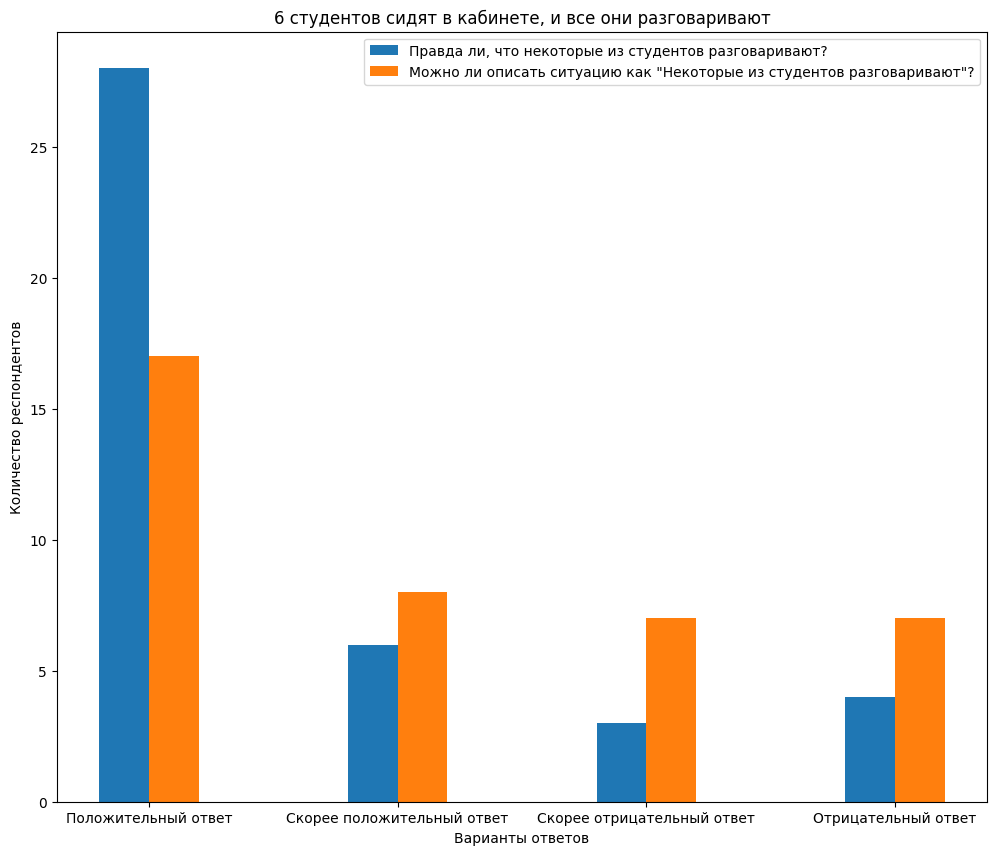

In [367]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans1_pravda = [q1_pravda[i] for i in X]
ans1_mozhno = [q1_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans1_pravda, 0.2, label = 'Правда ли, что некоторые из студентов разговаривают?')
plt.bar(X_axis + 0.1, ans1_mozhno, 0.2, label = 'Можно ли описать ситуацию как "Некоторые из студентов разговаривают"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("6 студентов сидят в кабинете, и все они разговаривают")
plt.legend()

plt.savefig('1.png')

plt.show()

In [368]:
contingency_table = np.array([ans1_pravda, ans1_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=5.346126321736078, pvalue=0.14813717131034915, dof=3, expected_freq=array([[23.0625,  7.175 ,  5.125 ,  5.6375],
       [21.9375,  6.825 ,  4.875 ,  5.3625]]))

## Третий стимул

In [369]:
q3_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что 5 студентов присутствуют на докладе?"].tolist()]))
q3_pravda

{'Скорее положительный ответ': 9,
 'Отрицательный ответ': 8,
 'Положительный ответ': 19,
 'Скорее отрицательный ответ': 5}

In [370]:
q3_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "Пятеро студентов присутствуют на докладе"?'].tolist()]))
q3_mozhno

{'Положительный ответ': 7,
 'Отрицательный ответ': 15,
 'Скорее отрицательный ответ': 5,
 'Скорее положительный ответ': 12}

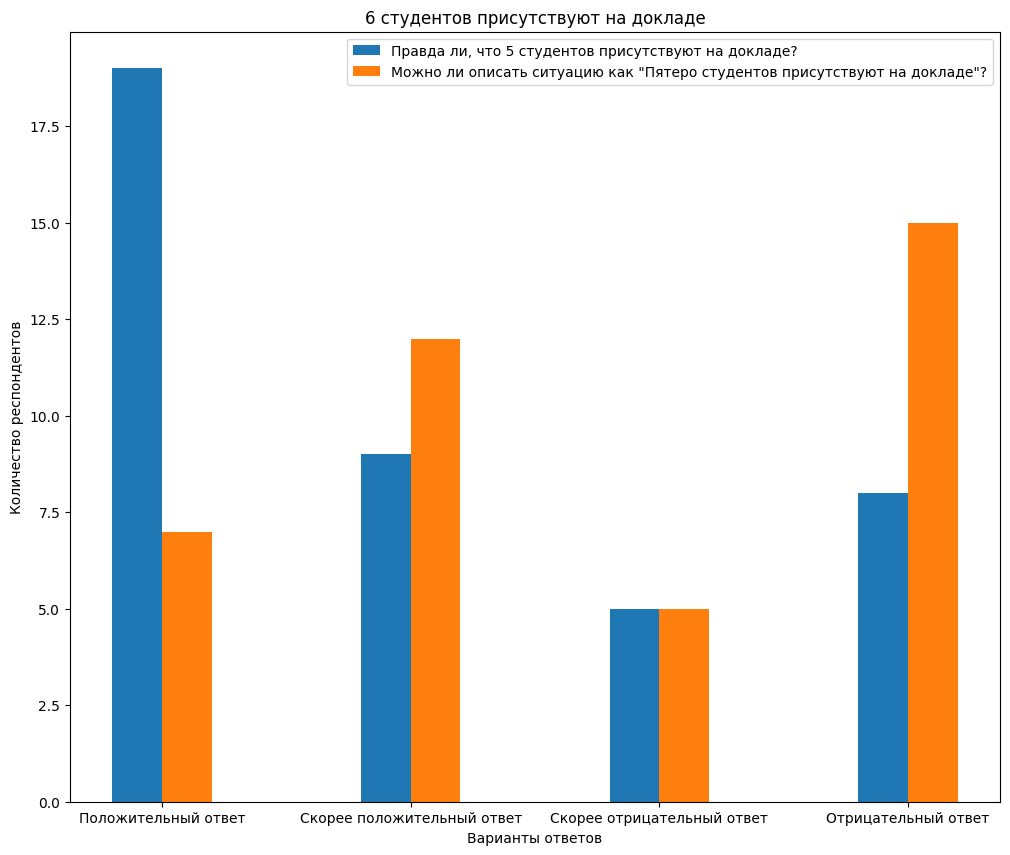

In [371]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans3_pravda = [q3_pravda[i] for i in X]
ans3_mozhno = [q3_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans3_pravda, 0.2, label = 'Правда ли, что 5 студентов присутствуют на докладе?')
plt.bar(X_axis + 0.1, ans3_mozhno, 0.2, label = 'Можно ли описать ситуацию как "Пятеро студентов присутствуют на докладе"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("6 студентов присутствуют на докладе")
plt.legend()

plt.savefig('2.png')

plt.show()

In [372]:
contingency_table = np.array([ans3_pravda, ans3_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=8.05250056249322, pvalue=0.044939047294000965, dof=3, expected_freq=array([[13.325 , 10.7625,  5.125 , 11.7875],
       [12.675 , 10.2375,  4.875 , 11.2125]]))

## Четвертый стимул

In [373]:
q4_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что некоторые из участников хора поют?"].tolist()]))
q4_pravda

{'Положительный ответ': 27,
 'Отрицательный ответ': 4,
 'Скорее положительный ответ': 8,
 'Скорее отрицательный ответ': 2}

In [374]:
q4_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "Некоторые из участников хора поют"?'].tolist()]))
q4_mozhno

{'Положительный ответ': 11,
 'Скорее отрицательный ответ': 7,
 'Скорее положительный ответ': 9,
 'Отрицательный ответ': 12}

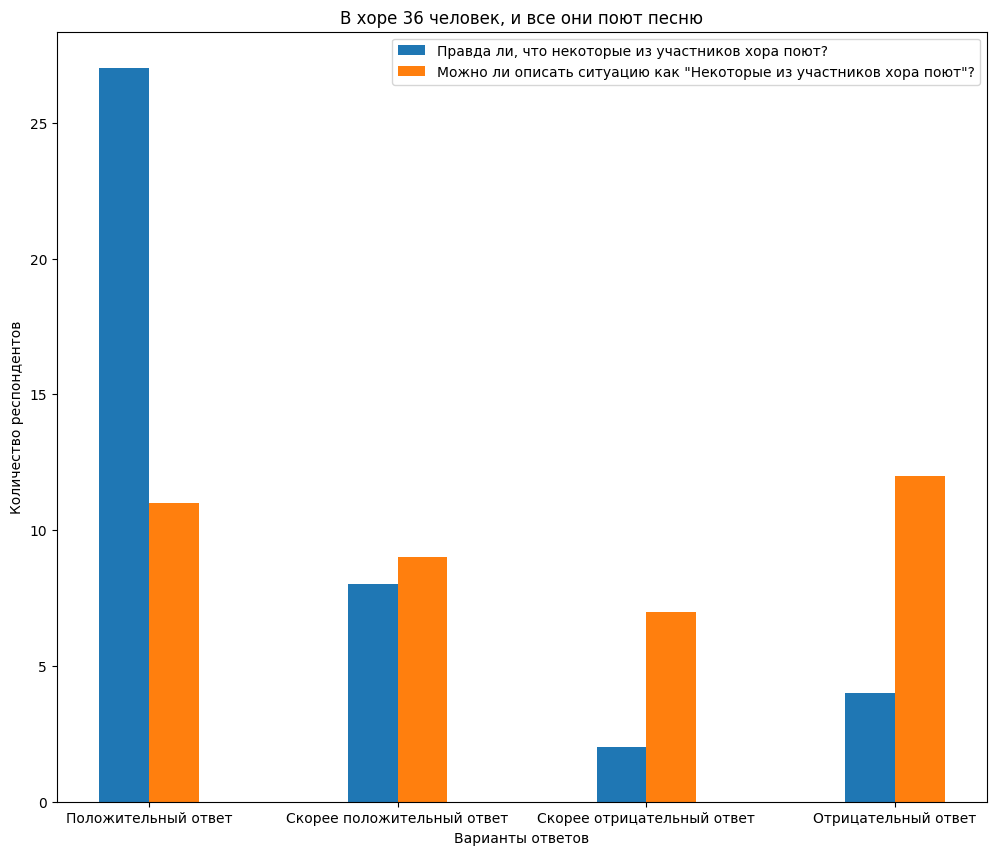

In [375]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans4_pravda = [q4_pravda[i] for i in X]
ans4_mozhno = [q4_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans4_pravda, 0.2, label = 'Правда ли, что некоторые из участников хора поют?')
plt.bar(X_axis + 0.1, ans4_mozhno, 0.2, label = 'Можно ли описать ситуацию как "Некоторые из участников хора поют"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("В хоре 36 человек, и все они поют песню")
plt.legend()

plt.savefig('3.png')

plt.show()

In [376]:
contingency_table = np.array([ans4_pravda, ans4_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=13.531900850484249, pvalue=0.0036167832203204586, dof=3, expected_freq=array([[19.475 ,  8.7125,  4.6125,  8.2   ],
       [18.525 ,  8.2875,  4.3875,  7.8   ]]))

## Пятый стимул

In [377]:
q5_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что 2 человека стоят в очереди?"].tolist()]))
q5_pravda

{'Скорее отрицательный ответ': 6,
 'Отрицательный ответ': 10,
 'Положительный ответ': 18,
 'Скорее положительный ответ': 7}

In [378]:
q5_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "2 человека стоят в очереди"?'].tolist()]))
q5_mozhno

{'Отрицательный ответ': 14,
 'Скорее положительный ответ': 8,
 'Скорее отрицательный ответ': 9,
 'Положительный ответ': 8}

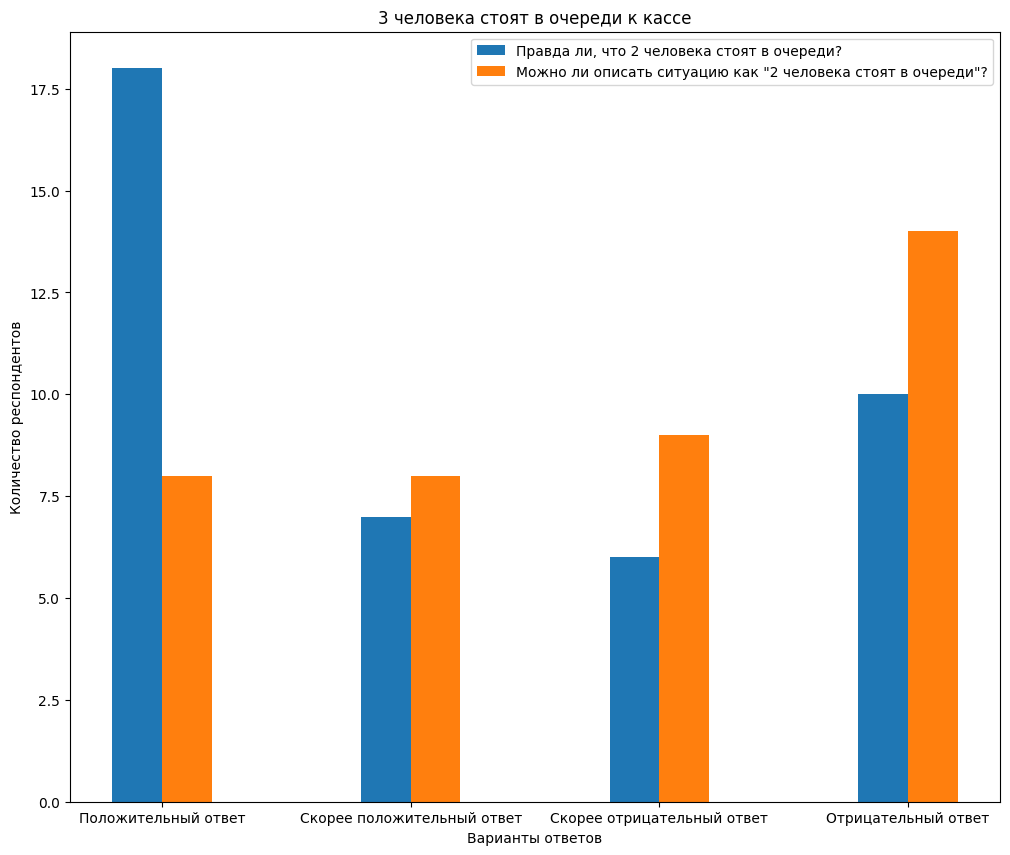

In [379]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans5_pravda = [q5_pravda[i] for i in X]
ans5_mozhno = [q5_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans5_pravda, 0.2, label = 'Правда ли, что 2 человека стоят в очереди?')
plt.bar(X_axis + 0.1, ans5_mozhno, 0.2, label = 'Можно ли описать ситуацию как "2 человека стоят в очереди"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("3 человека стоят в очереди к кассе")
plt.legend()

plt.savefig('4.png')

plt.show()

In [380]:
contingency_table = np.array([ans5_pravda, ans5_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=5.132695113933389, pvalue=0.16233446331978937, dof=3, expected_freq=array([[13.325 ,  7.6875,  7.6875, 12.3   ],
       [12.675 ,  7.3125,  7.3125, 11.7   ]]))

## Седьмой стимул

In [381]:
q7_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что девушка начала есть орехи?"].tolist()]))
q7_pravda

{'Скорее отрицательный ответ': 9,
 'Отрицательный ответ': 2,
 'Положительный ответ': 18,
 'Скорее положительный ответ': 12}

In [382]:
q7_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "Девушка начала есть орехи"?'].tolist()]))
q7_mozhno

{'Положительный ответ': 11,
 'Скорее положительный ответ': 15,
 'Отрицательный ответ': 4,
 'Скорее отрицательный ответ': 9}

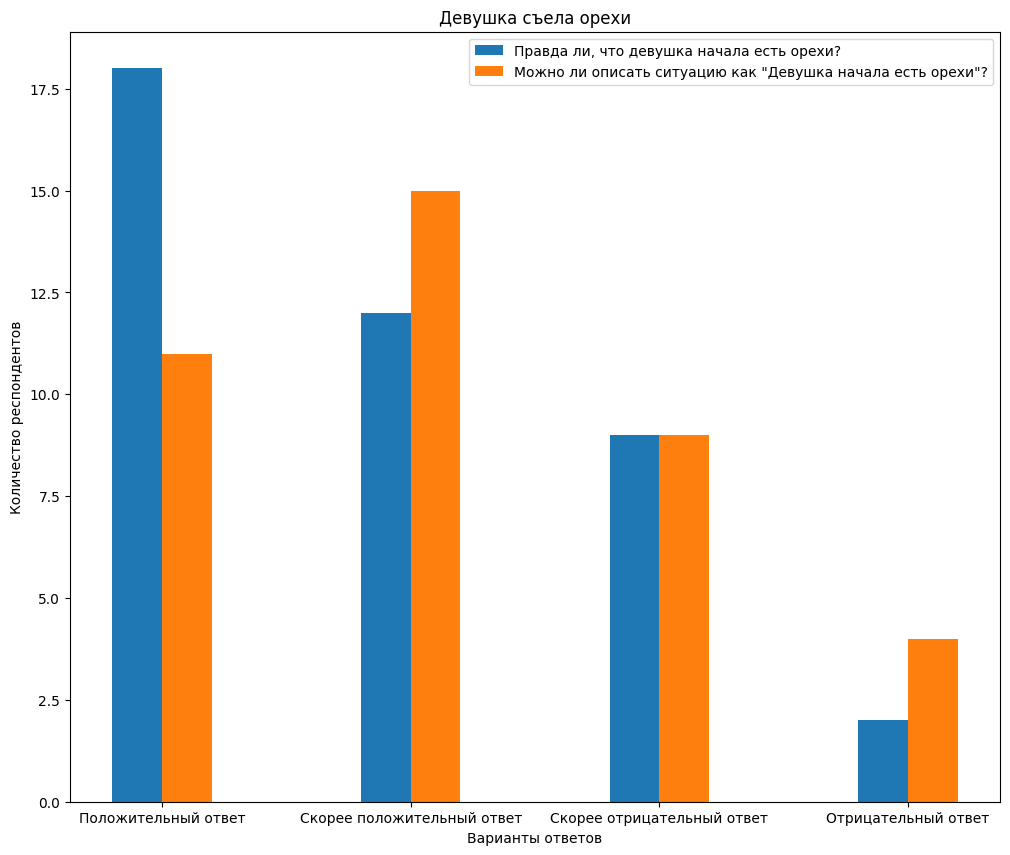

In [383]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans7_pravda = [q7_pravda[i] for i in X]
ans7_mozhno = [q7_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans7_pravda, 0.2, label = 'Правда ли, что девушка начала есть орехи?')
plt.bar(X_axis + 0.1, ans7_mozhno, 0.2, label = 'Можно ли описать ситуацию как "Девушка начала есть орехи"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("Девушка съела орехи")
plt.legend()

plt.savefig('5.png')

plt.show()

In [384]:
contingency_table = np.array([ans7_pravda, ans7_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=2.641305988656703, pvalue=0.450294046777877, dof=3, expected_freq=array([[14.8625, 13.8375,  9.225 ,  3.075 ],
       [14.1375, 13.1625,  8.775 ,  2.925 ]]))

## Девятый стимул

In [385]:
q9_pravda = dict(Counter([answer_dict[item] for item in pravda["Правда ли, что девушка начала пить воду?"].tolist()]))
q9_pravda

{'Отрицательный ответ': 3,
 'Скорее положительный ответ': 13,
 'Положительный ответ': 19,
 'Скорее отрицательный ответ': 6}

In [386]:
q9_mozhno = dict(Counter([answer_dict[item] for item in mozhno['Можно ли описать ситуацию как "Девушка начала пить воду"?'].tolist()]))
q9_mozhno

{'Скорее положительный ответ': 14,
 'Скорее отрицательный ответ': 12,
 'Положительный ответ': 10,
 'Отрицательный ответ': 3}

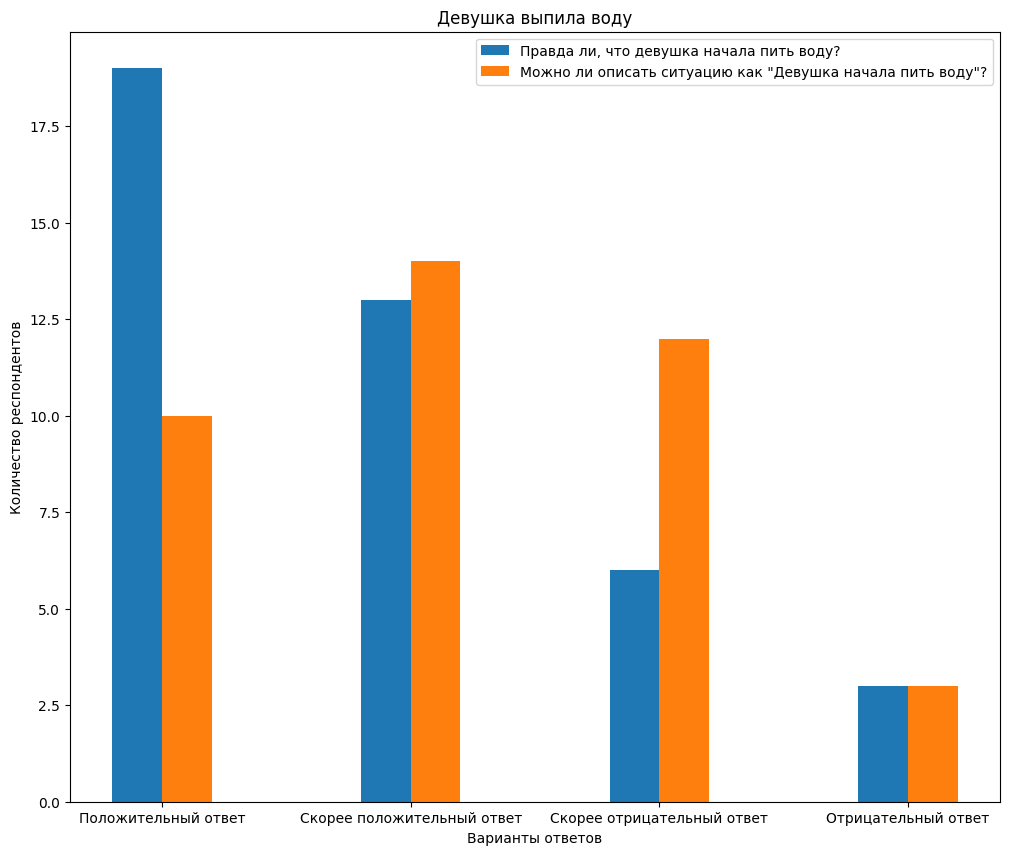

In [387]:
plt.figure(figsize=(12,10))

X = ['Положительный ответ','Скорее положительный ответ','Скорее отрицательный ответ','Отрицательный ответ']
ans9_pravda = [q9_pravda[i] for i in X]
ans9_mozhno = [q9_mozhno[i] for i in X]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, ans9_pravda, 0.2, label = 'Правда ли, что девушка начала пить воду?')
plt.bar(X_axis + 0.1, ans9_mozhno, 0.2, label = 'Можно ли описать ситуацию как "Девушка начала пить воду"?')

plt.xticks(X_axis, X)
plt.xlabel("Варианты ответов")
plt.ylabel("Количество респондентов")
plt.title("Девушка выпила воду")
plt.legend()

plt.savefig('6.png')

plt.show()

In [388]:
contingency_table = np.array([ans9_pravda, ans9_mozhno])
res = stats.chi2_contingency(contingency_table)
res

Chi2ContingencyResult(statistic=4.783129941526352, pvalue=0.18838386759761577, dof=3, expected_freq=array([[14.8625, 13.8375,  9.225 ,  3.075 ],
       [14.1375, 13.1625,  8.775 ,  2.925 ]]))

# Мода по вопросам в зависимости от формулировки и возраста респондентов

## 1 группа ("Правда ли...")

In [389]:
# первый стимул

q1_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что некоторые из студентов разговаривают?'], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_pravda_age = q1_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q1_crosstab_pravda_age

"Правда ли, что некоторые из студентов разговаривают?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,6.7%,73.3%,6.7%,13.3%
35+,0.0%,85.7%,0.0%,14.3%
до 21,15.8%,57.9%,10.5%,15.8%
Всего,9.8%,68.3%,7.3%,14.6%


In [390]:
# третий стимул

q3_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что 5 студентов присутствуют на докладе?'], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_pravda_age = q3_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q3_crosstab_pravda_age

"Правда ли, что 5 студентов присутствуют на докладе?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,6.7%,53.3%,13.3%,26.7%
35+,28.6%,42.9%,0.0%,28.6%
до 21,26.3%,42.1%,15.8%,15.8%
Всего,19.5%,46.3%,12.2%,22.0%


In [391]:
# четвертый стимул

q4_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что некоторые из участников хора поют?'], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_pravda_age = q4_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q4_crosstab_pravda_age

"Правда ли, что некоторые из участников хора поют?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,13.3%,60.0%,0.0%,26.7%
35+,0.0%,57.1%,28.6%,14.3%
до 21,10.5%,73.7%,0.0%,15.8%
Всего,9.8%,65.9%,4.9%,19.5%


In [392]:
# пятый стимул

q5_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что 2 человека стоят в очереди?'], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_pravda_age = q5_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q5_crosstab_pravda_age

"Правда ли, что 2 человека стоят в очереди?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,26.7%,53.3%,13.3%,6.7%
35+,28.6%,14.3%,28.6%,28.6%
до 21,21.1%,47.4%,10.5%,21.1%
Всего,24.4%,43.9%,14.6%,17.1%


In [393]:
# седьмой стимул

q7_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что девушка начала есть орехи?'], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_pravda_age = q7_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q7_crosstab_pravda_age

"Правда ли, что девушка начала есть орехи?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,0.0%,46.7%,20.0%,33.3%
35+,0.0%,0.0%,28.6%,71.4%
до 21,10.5%,57.9%,21.1%,10.5%
Всего,4.9%,43.9%,22.0%,29.3%


In [394]:
# девятый стимул

q9_crosstab_pravda_age = pd.crosstab(pravda['Возрастная группа'], pravda['Правда ли, что девушка начала пить воду?'], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_pravda_age = q9_crosstab_pravda_age.mul(100).round(1).astype(str).add('%')
q9_crosstab_pravda_age

"Правда ли, что девушка начала пить воду?",Неправда,Правда,Скорее неправда,Скорее правда
Возрастная группа,,,,
21-35,6.7%,46.7%,13.3%,33.3%
35+,14.3%,42.9%,42.9%,0.0%
до 21,5.3%,47.4%,5.3%,42.1%
Всего,7.3%,46.3%,14.6%,31.7%


## 2 группа ("Можно ли...")

In [395]:
# первый стимул

q1_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "Некоторые из студентов разговаривают"?'], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_mozhno_age = q1_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q1_crosstab_mozhno_age

"Можно ли описать ситуацию как ""Некоторые из студентов разговаривают""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,57.1%,28.6%,14.3%,0.0%
35+,55.6%,0.0%,11.1%,33.3%
до 21,25.0%,18.8%,31.2%,25.0%
Всего,43.6%,17.9%,20.5%,17.9%


In [396]:
# третий стимул

q3_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "Пятеро студентов присутствуют на докладе"?'], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_mozhno_age = q3_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q3_crosstab_mozhno_age

"Можно ли описать ситуацию как ""Пятеро студентов присутствуют на докладе""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,21.4%,42.9%,28.6%,7.1%
35+,44.4%,33.3%,11.1%,11.1%
до 21,0.0%,37.5%,43.8%,18.8%
Всего,17.9%,38.5%,30.8%,12.8%


In [397]:
# четвертый стимул

q4_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "Некоторые из участников хора поют"?'], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_mozhno_age = q4_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q4_crosstab_mozhno_age

"Можно ли описать ситуацию как ""Некоторые из участников хора поют""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,42.9%,28.6%,28.6%,0.0%
35+,33.3%,22.2%,22.2%,22.2%
до 21,12.5%,37.5%,18.8%,31.2%
Всего,28.2%,30.8%,23.1%,17.9%


In [398]:
# пятый стимул

q5_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "2 человека стоят в очереди"?'], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_mozhno_age = q5_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q5_crosstab_mozhno_age

"Можно ли описать ситуацию как ""2 человека стоят в очереди""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,21.4%,28.6%,7.1%,42.9%
35+,44.4%,22.2%,22.2%,11.1%
до 21,6.2%,50.0%,31.2%,12.5%
Всего,20.5%,35.9%,20.5%,23.1%


In [399]:
# седьмой стимул

q7_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "Девушка начала есть орехи"?'], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_mozhno_age = q7_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q7_crosstab_mozhno_age

"Можно ли описать ситуацию как ""Девушка начала есть орехи""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,35.7%,0.0%,35.7%,28.6%
35+,11.1%,11.1%,55.6%,22.2%
до 21,31.2%,18.8%,31.2%,18.8%
Всего,28.2%,10.3%,38.5%,23.1%


In [400]:
# девятый стимул

q9_crosstab_mozhno_age = pd.crosstab(mozhno['Возрастная группа'], mozhno['Можно ли описать ситуацию как "Девушка начала пить воду"?'], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_mozhno_age = q9_crosstab_mozhno_age.mul(100).round(1).astype(str).add('%')
q9_crosstab_mozhno_age

"Можно ли описать ситуацию как ""Девушка начала пить воду""?",Можно,Нельзя,Скорее можно,Скорее нельзя
Возрастная группа,,,,
21-35,28.6%,7.1%,28.6%,35.7%
35+,22.2%,11.1%,55.6%,11.1%
до 21,25.0%,6.2%,31.2%,37.5%
Всего,25.6%,7.7%,35.9%,30.8%


# Мода по вопросам в зависимости от формулировки и пола респондентов

## 1 группа ("Правда ли...")

In [401]:
# первый стимул

q1_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что некоторые из студентов разговаривают?'], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_pravda_gender = q1_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q1_crosstab_pravda_gender

"Правда ли, что некоторые из студентов разговаривают?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,3.6%,78.6%,10.7%,7.1%
Мужской,23.1%,46.2%,0.0%,30.8%
Всего,9.8%,68.3%,7.3%,14.6%


In [402]:
# третий стимул

q3_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что 5 студентов присутствуют на докладе?'], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_pravda_gender = q3_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q3_crosstab_pravda_gender

"Правда ли, что 5 студентов присутствуют на докладе?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,10.7%,42.9%,17.9%,28.6%
Мужской,38.5%,53.8%,0.0%,7.7%
Всего,19.5%,46.3%,12.2%,22.0%


In [403]:
# четвертый стимул

q4_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что некоторые из участников хора поют?'], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_pravda_gender = q4_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q4_crosstab_pravda_gender

"Правда ли, что некоторые из участников хора поют?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,3.6%,64.3%,7.1%,25.0%
Мужской,23.1%,69.2%,0.0%,7.7%
Всего,9.8%,65.9%,4.9%,19.5%


In [404]:
# пятый стимул

q5_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что 2 человека стоят в очереди?'], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_pravda_gender = q5_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q5_crosstab_pravda_gender

"Правда ли, что 2 человека стоят в очереди?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,17.9%,46.4%,14.3%,21.4%
Мужской,38.5%,38.5%,15.4%,7.7%
Всего,24.4%,43.9%,14.6%,17.1%


In [405]:
# седьмой стимул

q7_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что девушка начала есть орехи?'], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_pravda_gender = q7_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q7_crosstab_pravda_gender

"Правда ли, что девушка начала есть орехи?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,3.6%,53.6%,17.9%,25.0%
Мужской,7.7%,23.1%,30.8%,38.5%
Всего,4.9%,43.9%,22.0%,29.3%


In [406]:
# девятый стимул

q9_crosstab_pravda_gender = pd.crosstab(pravda['Укажите, пожалуйста, Ваш пол'], pravda['Правда ли, что девушка начала пить воду?'], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_pravda_gender = q9_crosstab_pravda_gender.mul(100).round(1).astype(str).add('%')
q9_crosstab_pravda_gender

"Правда ли, что девушка начала пить воду?",Неправда,Правда,Скорее неправда,Скорее правда
"Укажите, пожалуйста, Ваш пол",,,,
Женский,7.1%,53.6%,10.7%,28.6%
Мужской,7.7%,30.8%,23.1%,38.5%
Всего,7.3%,46.3%,14.6%,31.7%


## 2 группа ("Можно ли...")

In [407]:
# первый стимул

q1_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "Некоторые из студентов разговаривают"?'], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_mozhno_gender = q1_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q1_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""Некоторые из студентов разговаривают""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,52.4%,23.8%,9.5%,14.3%
Мужской,33.3%,11.1%,33.3%,22.2%
Всего,43.6%,17.9%,20.5%,17.9%


In [408]:
# третий стимул

q3_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "Пятеро студентов присутствуют на докладе"?'], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_mozhno_gender = q3_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q3_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""Пятеро студентов присутствуют на докладе""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,9.5%,33.3%,42.9%,14.3%
Мужской,27.8%,44.4%,16.7%,11.1%
Всего,17.9%,38.5%,30.8%,12.8%


In [409]:
# четвертый стимул

q4_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "Некоторые из участников хора поют"?'], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_mozhno_gender = q4_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q4_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""Некоторые из участников хора поют""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,19.0%,38.1%,23.8%,19.0%
Мужской,38.9%,22.2%,22.2%,16.7%
Всего,28.2%,30.8%,23.1%,17.9%


In [410]:
# пятый стимул

q5_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "2 человека стоят в очереди"?'], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_mozhno_gender = q5_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q5_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""2 человека стоят в очереди""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,9.5%,33.3%,19.0%,38.1%
Мужской,33.3%,38.9%,22.2%,5.6%
Всего,20.5%,35.9%,20.5%,23.1%


In [411]:
# седьмой стимул

q7_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "Девушка начала есть орехи"?'], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_mozhno_gender = q7_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q7_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""Девушка начала есть орехи""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,28.6%,14.3%,28.6%,28.6%
Мужской,27.8%,5.6%,50.0%,16.7%
Всего,28.2%,10.3%,38.5%,23.1%


In [412]:
# девятый стимул

q9_crosstab_mozhno_gender = pd.crosstab(mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Можно ли описать ситуацию как "Девушка начала пить воду"?'], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_mozhno_gender = q9_crosstab_mozhno_gender.mul(100).round(1).astype(str).add('%')
q9_crosstab_mozhno_gender

"Можно ли описать ситуацию как ""Девушка начала пить воду""?",Можно,Нельзя,Скорее можно,Скорее нельзя
"Укажите, пожалуйста, Ваш пол",,,,
Женский,23.8%,4.8%,33.3%,38.1%
Мужской,27.8%,11.1%,38.9%,22.2%
Всего,25.6%,7.7%,35.9%,30.8%


# Мода по вопросам в зависимости от формулировки, а также пола и возраста респондентов

## 1 группа ("Правда ли...")

In [413]:
# первый стимул

q1_crosstab_pravda = pd.crosstab(pravda['Правда ли, что некоторые из студентов разговаривают?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_pravda = q1_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q1_crosstab_pravda

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Правда ли, что некоторые из студентов разговари...                         
Неправда                                             25.0%   0.0%   0.0%   
Правда                                               28.6%  17.9%  32.1%   
Скорее неправда                                      33.3%   0.0%  66.7%   
Скорее правда                                        16.7%   0.0%  16.7%   
Всего                                                26.8%  12.2%  29.3%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Правда ли, что некоторые из студентов разговари...                        
Неправда                                              0.0%   0.0%  75.0%  
Правда                                               10.7%   3.6%   7.1%  
Скорее неправда                                       0.0%   0.0%   0.0%  
Скорее правда                                        16.7%  16.7%  33.3%  
Всего                                                 9.8%   4.9%  17.1%

In [414]:
# третий стимул

q3_crosstab_pravda = pd.crosstab(pravda['Правда ли, что 5 студентов присутствуют на докладе?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_pravda = q3_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q3_crosstab_pravda

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Правда ли, что 5 студентов присутствуют на докл...                         
Неправда                                              0.0%  25.0%  12.5%   
Правда                                               26.3%  10.5%  26.3%   
Скорее неправда                                      40.0%   0.0%  60.0%   
Скорее правда                                        44.4%  11.1%  33.3%   
Всего                                                26.8%  12.2%  29.3%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Правда ли, что 5 студентов присутствуют на докл...                        
Неправда                                             12.5%   0.0%  50.0%  
Правда                                               15.8%   5.3%  15.8%  
Скорее неправда                                       0.0%   0.0%   0.0%  
Скорее правда                                         0.0%  11.1%   0.0%  
Всего                                                 9.8%   4.9%  17.1%

In [415]:
# четвертый стимул

q4_crosstab_pravda = pd.crosstab(pravda['Правда ли, что некоторые из участников хора поют?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_pravda = q4_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q4_crosstab_pravda

Укажите, пожалуйста, Ваш пол                      Женский                 \
Возрастная группа                                   21-35     35+  до 21   
Правда ли, что некоторые из участников хора поют?                          
Неправда                                            25.0%    0.0%   0.0%   
Правда                                              25.9%    7.4%  33.3%   
Скорее неправда                                      0.0%  100.0%   0.0%   
Скорее правда                                       37.5%   12.5%  37.5%   
Всего                                               26.8%   12.2%  29.3%   

Укажите, пожалуйста, Ваш пол                      Мужской               
Возрастная группа                                   21-35   35+  до 21  
Правда ли, что некоторые из участников хора поют?                       
Неправда                                            25.0%  0.0%  50.0%  
Правда                                               7.4%  7.4%  18.5%  
Скорее неправда                                      0.0%  0.0%   0.0%  
Скорее правда                                       12.5%  0.0%   0.0%  
Всего                                                9.8%  4.9%  17.1%

In [416]:
# пятый стимул

q5_crosstab_pravda = pd.crosstab(pravda['Правда ли, что 2 человека стоят в очереди?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_pravda = q5_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q5_crosstab_pravda

Укажите, пожалуйста, Ваш пол               Женский               Мужской  \
Возрастная группа                            21-35    35+  до 21   21-35   
Правда ли, что 2 человека стоят в очереди?                                 
Неправда                                     40.0%   0.0%  10.0%    0.0%   
Правда                                       27.8%   5.6%  38.9%   16.7%   
Скорее неправда                              16.7%  33.3%  16.7%   16.7%   
Скорее правда                                14.3%  28.6%  42.9%    0.0%   
Всего                                        26.8%  12.2%  29.3%    9.8%   

Укажите, пожалуйста, Ваш пол                              
Возрастная группа                             35+  до 21  
Правда ли, что 2 человека стоят в очереди?                
Неправда                                    20.0%  30.0%  
Правда                                       0.0%  11.1%  
Скорее неправда                              0.0%  16.7%  
Скорее правда                                0.0%  14.3%  
Всего                                        4.9%  17.1%

In [417]:
# седьмой стимул

q7_crosstab_pravda = pd.crosstab(pravda['Правда ли, что девушка начала есть орехи?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_pravda = q7_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q7_crosstab_pravda

Укажите, пожалуйста, Ваш пол              Женский               Мужской  \
Возрастная группа                           21-35    35+  до 21   21-35   
Правда ли, что девушка начала есть орехи?                                 
Неправда                                     0.0%   0.0%  50.0%    0.0%   
Правда                                      33.3%   0.0%  50.0%    5.6%   
Скорее неправда                             33.3%  11.1%  11.1%    0.0%   
Скорее правда                               16.7%  33.3%   8.3%   25.0%   
Всего                                       26.8%  12.2%  29.3%    9.8%   

Укажите, пожалуйста, Ваш пол                             
Возрастная группа                            35+  до 21  
Правда ли, что девушка начала есть орехи?                
Неправда                                    0.0%  50.0%  
Правда                                      0.0%  11.1%  
Скорее неправда                            11.1%  33.3%  
Скорее правда                               8.3%   8.3%  
Всего                                       4.9%  17.1%

In [418]:
# девятый стимул

q9_crosstab_pravda = pd.crosstab(pravda['Правда ли, что девушка начала пить воду?'], [pravda['Укажите, пожалуйста, Ваш пол'], pravda['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_pravda = q9_crosstab_pravda.mul(100).round(1).astype(str).add('%')
q9_crosstab_pravda

Укажите, пожалуйста, Ваш пол             Женский               Мужской         \
Возрастная группа                          21-35    35+  до 21   21-35    35+   
Правда ли, что девушка начала пить воду?                                        
Неправда                                   33.3%  33.3%   0.0%    0.0%   0.0%   
Правда                                     26.3%  15.8%  36.8%   10.5%   0.0%   
Скорее неправда                            33.3%  16.7%   0.0%    0.0%  33.3%   
Скорее правда                              23.1%   0.0%  38.5%   15.4%   0.0%   
Всего                                      26.8%  12.2%  29.3%    9.8%   4.9%   

Укажите, пожалуйста, Ваш пол                     
Возрастная группа                         до 21  
Правда ли, что девушка начала пить воду?         
Неправда                                  33.3%  
Правда                                    10.5%  
Скорее неправда                           16.7%  
Скорее правда                             23.1%  
Всего                                     17.1%

## 2 группа ("Можно ли...")

In [419]:
# первый стимул

q1_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "Некоторые из студентов разговаривают"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q1_crosstab_mozhno = q1_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q1_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "Некоторые из сту...                         
Можно                                                41.2%   5.9%  17.6%   
Нельзя                                               42.9%   0.0%  28.6%   
Скорее можно                                         12.5%   0.0%  12.5%   
Скорее нельзя                                         0.0%  14.3%  28.6%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "Некоторые из сту...                        
Можно                                                 5.9%  23.5%   5.9%  
Нельзя                                               14.3%   0.0%  14.3%  
Скорее можно                                         12.5%  12.5%  50.0%  
Скорее нельзя                                         0.0%  28.6%  28.6%  
Всего                                                 7.7%  17.9%  20.5%

In [420]:
# третий стимул

q3_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "Пятеро студентов присутствуют на докладе"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q3_crosstab_mozhno = q3_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q3_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "Пятеро студентов...                         
Можно                                                28.6%   0.0%   0.0%   
Нельзя                                               26.7%   6.7%  13.3%   
Скорее можно                                         33.3%   0.0%  41.7%   
Скорее нельзя                                        20.0%  20.0%  20.0%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "Пятеро студентов...                        
Можно                                                14.3%  57.1%   0.0%  
Нельзя                                               13.3%  13.3%  26.7%  
Скорее можно                                          0.0%   8.3%  16.7%  
Скорее нельзя                                         0.0%   0.0%  40.0%  
Всего                                                 7.7%  17.9%  20.5%

In [421]:
# четвертый стимул

q4_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "Некоторые из участников хора поют"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q4_crosstab_mozhno = q4_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q4_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "Некоторые из уча...                         
Можно                                                36.4%   0.0%   0.0%   
Нельзя                                               33.3%   8.3%  25.0%   
Скорее можно                                         33.3%  11.1%  11.1%   
Скорее нельзя                                         0.0%   0.0%  57.1%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "Некоторые из уча...                        
Можно                                                18.2%  27.3%  18.2%  
Нельзя                                                0.0%   8.3%  25.0%  
Скорее можно                                         11.1%  11.1%  22.2%  
Скорее нельзя                                         0.0%  28.6%  14.3%  
Всего                                                 7.7%  17.9%  20.5%

In [422]:
# пятый стимул

q5_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "2 человека стоят в очереди"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q5_crosstab_mozhno = q5_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q5_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "2 человека стоят...                         
Можно                                                25.0%   0.0%   0.0%   
Нельзя                                               14.3%   0.0%  35.7%   
Скорее можно                                         12.5%  12.5%  25.0%   
Скорее нельзя                                        66.7%  11.1%  11.1%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "2 человека стоят...                        
Можно                                                12.5%  50.0%  12.5%  
Нельзя                                               14.3%  14.3%  21.4%  
Скорее можно                                          0.0%  12.5%  37.5%  
Скорее нельзя                                         0.0%   0.0%  11.1%  
Всего                                                 7.7%  17.9%  20.5%

In [423]:
# седьмой стимул

q7_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "Девушка начала есть орехи"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q7_crosstab_mozhno = q7_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q7_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "Девушка начала е...                         
Можно                                                27.3%   0.0%  27.3%   
Нельзя                                                0.0%  25.0%  50.0%   
Скорее можно                                         26.7%   6.7%   6.7%   
Скорее нельзя                                        44.4%   0.0%  22.2%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "Девушка начала е...                        
Можно                                                18.2%   9.1%  18.2%  
Нельзя                                                0.0%   0.0%  25.0%  
Скорее можно                                          6.7%  26.7%  26.7%  
Скорее нельзя                                         0.0%  22.2%  11.1%  
Всего                                                 7.7%  17.9%  20.5%

In [424]:
# девятый стимул

q9_crosstab_mozhno = pd.crosstab(mozhno['Можно ли описать ситуацию как "Девушка начала пить воду"?'], [mozhno['Укажите, пожалуйста, Ваш пол'], mozhno['Возрастная группа']], normalize = "index", margins=True, margins_name = "Всего")
q9_crosstab_mozhno = q9_crosstab_mozhno.mul(100).round(1).astype(str).add('%')
q9_crosstab_mozhno

Укажите, пожалуйста, Ваш пол                       Женский                \
Возрастная группа                                    21-35    35+  до 21   
Можно ли описать ситуацию как "Девушка начала п...                         
Можно                                                20.0%   0.0%  30.0%   
Нельзя                                                0.0%   0.0%  33.3%   
Скорее можно                                         28.6%  14.3%   7.1%   
Скорее нельзя                                        41.7%   0.0%  25.0%   
Всего                                                28.2%   5.1%  20.5%   

Укажите, пожалуйста, Ваш пол                       Мужской                
Возрастная группа                                    21-35    35+  до 21  
Можно ли описать ситуацию как "Девушка начала п...                        
Можно                                                20.0%  20.0%  10.0%  
Нельзя                                               33.3%  33.3%   0.0%  
Скорее можно                                          0.0%  21.4%  28.6%  
Скорее нельзя                                         0.0%   8.3%  25.0%  
Всего                                                 7.7%  17.9%  20.5%